<a href="https://colab.research.google.com/github/pythmipt/SpamFilter/blob/main/Rustam_Musin_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Занятие 31. Домашнее задание. Работа над проектами



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint

## Описание проекта
**Название проекта** -   

 **Цель** — получить конечный продукт или результат (статья…)  


**Введение**: основные положения, назначение проекта,  команда


**Актуальность** : кому проект полезен,  что достигаем, меняем, улучшаем его реализацией  

**Целевая аудитория** 

**Обзор аналогов и прототипов**: есть ли существующие решения? Чем ваше отличается от остальных?

**Выбор инструментальных средств**: в этом разделе обосновываем свой выбор инструментов разработки;


 **Сроки**  — дата начала проекта и дата его окончания  

        График выполнения проекта

 **Ресурсы:**  трудовые, финансовые, оборудование,  информация.








## Аннотация  проекта

При составлении аннотации придерживайтесь плана:

**Название** (помимо текста желательно и логотип); 

**Описание** (с использованием слов и изображений); 

**Демо** (изображения, ссылки на видео, интерактивные демо-ссылки); 

**Технологии в проекте**; 

**Специфика**, что-то характерное для проекта (проблемы, с которыми пришлось столкнуться, уникальные составляющие проекта); 

**Техническое описание** проекта (установка, настройка).



In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.replace({'ham': 0, 'spam': 1}, inplace=True)
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
num_words = 10000
max_len = 100
rez = df['v1']
mails = df['v2']

In [ ]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(mails)

In [ ]:
mails = tokenizer.texts_to_sequences(mails)

In [ ]:
mails_train = pad_sequences(mails, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_save_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history = model.fit(mails_train, rez, epochs=10, batch_size=128,
                    validation_split=0.1, callbacks=[checkpoint_callback])

Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9992
Epoch 1: val_accuracy did not improve from 0.99283
40/40 [==============================] - 14s 342ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0236 - val_accuracy: 0.9928
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9994
Epoch 2: val_accuracy did not improve from 0.99283
40/40 [==============================] - 14s 339ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0269 - val_accuracy: 0.9928
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9996
Epoch 3: val_accuracy did not improve from 0.99283
40/40 [==============================] - 16s 401ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0323 - val_accuracy: 0.9928
Epoch 4/10
40/40 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9996
Epoch 4: val_accuracy did not improve from 0.99283
40/40 [=================

In [ ]:
model.load_weights(model_save_path)

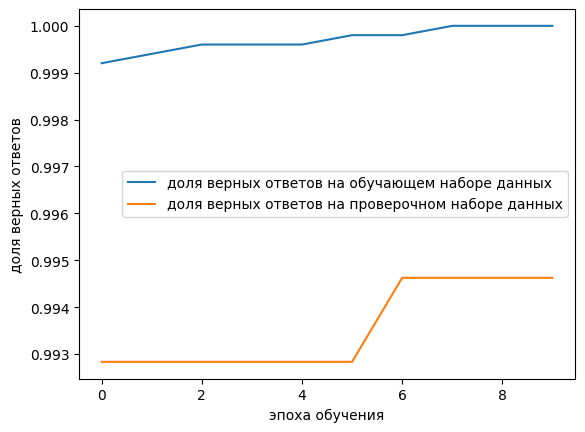

In [ ]:
plt.plot(history.history['accuracy'],
         label='доля верных ответов на обучающем наборе данных')
plt.plot(history.history['val_accuracy'],
         label='доля верных ответов на проверочном наборе данных')
plt.xlabel('эпоха обучения')
plt.ylabel('доля верных ответов')
plt.legend()
plt.show()

In [ ]:
text = 'Hello, Maxim! Actually, good job! I find your project amazing 8-)'

In [ ]:
text = tokenizer.texts_to_sequences([text])

In [ ]:
text = pad_sequences(text, maxlen=max_len)

In [ ]:
result = model.predict(text)
result

1/1 [==============================] - 0s 45ms/step


array([[8.713022e-05]], dtype=float32)

In [ ]:
text1 = 'Congrats! You won a wonderfull opportunity to buy brend new IPhone 14 with 70% sale!'
text1 = tokenizer.texts_to_sequences([text1])
text1 = pad_sequences(text1, maxlen=max_len)

In [ ]:
result = model.predict(text1)
result

1/1 [==============================] - 0s 27ms/step


array([[0.8648266]], dtype=float32)